<a href="https://colab.research.google.com/github/jechavarria12/Parcial_1_Fraude/blob/main/Parcial_1_Fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Parcial 1


# 0. Preparaci√≥n del entorno

##0.1 Instalaci√≥n de librer√≠as


In [ ]:
#Instalaci√≥n de las librer√≠as
!pip install -q pandas
!pip install -q numpy
!pip install -q scipy
!pip install -q matplotlib
!pip install -q seaborn
!pip install -q plotly
!pip install -q yellowbrick
!pip install -q scikit-learn
!pip install -q imbalanced-learn
!pip install -q tqdm
!pip install -q joblib
!pip install -q huggingface_hub
!pip install -q datasets
!pip install ydata_profiling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 484.9/484.9 kB 14.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 143.5/143.5 kB 13.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.8/194.8 kB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 390.9/390.9 kB 13.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 296.5/296.5 kB 27.2 MB/s eta 0

## 0.2 Definir semilla

In [ ]:
# Importar las librer√≠as necesarias y definir la semilla
import pandas as pd
from datasets import load_dataset
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

SEED = 42

# 1 Carga y Explicaci√≥n del dataset

Este estudio se centrar√° en predecir si una transacci√≥n financiera es fraudulenta o no utilizando la base de datos `credit_fraud_detection `de Hugging Face. Para esto, se proporciona informaci√≥n detallada sobre cada transacci√≥n como: montos, saldos previos y posteriores, y tipos de operaci√≥n como transacciones en efectivo, pagos o transferencias. Tmbi√©n, incluye indicadores binarios que permiten clasificar si una transacci√≥n es fraudulenta o si ha resultado en un sobregiro no autorizado. La variable que se quiere predecir es la variable binaria `"isFraud"` que toma un valor de 1 si la transacci√≥n es fraudulenta y 0 de lo contrario. Este conjunto de datos es √∫til porque tiene muchas observaci√≥nes (m√°s de 3 millones), lo que permite entrenar los modelos de de aprendizaje autom√°tico para que aprendan a detectar fraudes en tiempo real, ayudando a las instituciones financieras a prevenir p√©rdidas y mejorar la seguridad de sus sistemas de pago.

In [ ]:
#Como nuestro Dataset ya est√° dividido en variables de trai y test imposrtamos estas ya separadas del archivo
# Definir las rutas de los archivos en Hugging Face
splits = {
    'train': 'hf://datasets/rohan-chandrashekar/credit_fraud_detection/data/train-00000-of-00001.parquet',

    'test': 'hf://datasets/rohan-chandrashekar/credit_fraud_detection/data/test-00000-of-00001.parquet'
}

# Cargar los datos en DataFrames
df_train = pd.read_parquet(splits['train'])
df_test = pd.read_parquet(splits['test'])

# Mostrar informaci√≥n b√°sica
print(f"Tama√±o de train: {df_train.shape}")
print(f"Tama√±o de test: {df_test.shape}")

# Vista previa de los datos
print(df_train.head())

Tama√±o de train: (2599503, 14)
Tama√±o de test: (557037, 14)
       amount  nameOrig  oldBalanceOrig  newBalanceOrig  nameDest  \
0    83567.84      1270            0.00        83567.84     17600   
1  1221867.91     70795      1221867.91            0.00     22281   
2   322138.17      2881      1595257.55      1917395.71     37826   
3    89476.25     21364      1018602.32      1108078.57     32142   
4    14372.57     20391       603534.13       617906.69      9164   

   oldBalanceDest  newBalanceDest  isFraud  isUnauthorizedOverdraft  \
0        34594.35        34594.35        0                        0   
1        34873.36        34873.36        1                        0   
2       121986.83       121986.83        0                        0   
3        44718.52        44718.52        0                        0   
4       108732.54       108732.54        0                        0   

   action__CASH_IN  action__CASH_OUT  action__DEBIT  action__PAYMENT  \
0                1      

La base de datos se compone de 14 columnas, que son las diferentes variables y 3.713.576 de observaciones que ya est√°n divididas en el grupo de entrenameinto, validaci√≥n y prueba.

El conjunto de datos de detecci√≥n de fraude crediticio disponible en [Hugging Face](https://huggingface.co/datasets/rohan-chandrashekar/credit_fraud_detection) contiene las siguientes 14 variables representadas en las columnas:

| **Columna**                  | **Descripci√≥n**                                                                                                                                                                                                 | **Tipo de Variable** |
|-------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------|
| `amount`                      | Monto de la transacci√≥n.                                                                                                                                                                                        | Num√©rica (float64)   |
| `nameOrig`                    | Identificador √∫nico del cliente que inicia la transacci√≥n.                                                                                                                                                      | Categ√≥rica (int64)   |
| `oldBalanceOrig`              | Saldo de la cuenta del originador antes de la transacci√≥n.                                                                                                                                                      | Num√©rica (float64)   |
| `newBalanceOrig`              | Saldo de la cuenta del originador despu√©s de la transacci√≥n.                                                                                                                                                    | Num√©rica (float64)   |
| `nameDest`                    | Identificador √∫nico del cliente o entidad que recibe la transacci√≥n.                                                                                                                                            | Categ√≥rica (int64)   |
| `oldBalanceDest`              | Saldo de la cuenta del destinatario antes de la transacci√≥n.                                                                                                                                                    | Num√©rica (float64)   |
| `newBalanceDest`              | Saldo de la cuenta del destinatario despu√©s de la transacci√≥n.                                                                                                                                                  | Num√©rica (float64)   |
| `isFraud`                     | Indicador de si la transacci√≥n es fraudulenta (1) o no (0).                                                                                                                                                     | Binaria (int64)      |
| `isUnauthorizedOverdraft`     | Indicador de si la transacci√≥n result√≥ en un sobregiro no autorizado (1) o no (0).                                                                                                                              | Binaria (int64)      |
| `action__CASH_IN`             | Indicador de si la acci√≥n de la transacci√≥n es un dep√≥sito de efectivo (1) o no (0).                                                                                                                            | Binaria (int64)      |
| `action__CASH_OUT`            | Indicador de si la acci√≥n de la transacci√≥n es un retiro de efectivo (1) o no (0).                                                                                                                              | Binaria (int64)      |
| `action__DEBIT`               | Indicador de si la acci√≥n de la transacci√≥n es un d√©bito (1) o no (0).                                                                                                                                           | Binaria (int64)      |
| `action__PAYMENT`             | Indicador de si la acci√≥n de la transacci√≥n es un pago (1) o no (0).                                                                                                                                            | Binaria (int64)      |
| `action__TRANSFER`            | Indicador de si la acci√≥n de la transacci√≥n es una transferencia (1) o no (0).                                                                                                                                   | Binaria (int64)      |


## 1.1 Division de datos train y test

In [ ]:
#En esta casilla podemos reducir el numero de datos que vamos a escoger porque realmente se dividen arriba (se cargan ya divididos)

display(df_train.head())
display(df_test.head())

amount  nameOrig  oldBalanceOrig  newBalanceOrig  nameDest  \
0    83567.84      1270            0.00        83567.84     17600   
1  1221867.91     70795      1221867.91            0.00     22281   
2   322138.17      2881      1595257.55      1917395.71     37826   
3    89476.25     21364      1018602.32      1108078.57     32142   
4    14372.57     20391       603534.13       617906.69      9164   

   oldBalanceDest  newBalanceDest  isFraud  isUnauthorizedOverdraft  \
0        34594.35        34594.35        0                        0   
1        34873.36        34873.36        1                        0   
2       121986.83       121986.83        0                        0   
3        44718.52        44718.52        0                        0   
4       108732.54       108732.54        0                        0   

   action__CASH_IN  action__CASH_OUT  action__DEBIT  action__PAYMENT  \
0                1                 0              0                0   
1                0                 1              0                0   
2                1                 0              0                0   
3                1                 0              0                0   
4                1                 0              0                0   

   action__TRANSFER  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

amount  nameOrig  oldBalanceOrig  newBalanceOrig  nameDest  \
0   73800.89     15374      2534460.75      2460659.86     35922   
1  196871.36     14559      1539057.79      1735929.16     48287   
2  230141.98     22934       502864.24       733006.22     31892   
3  227774.04      8379        60025.05       287799.09       978   
4   65725.33      5391      2851847.83      2917573.16     35100   

   oldBalanceDest  newBalanceDest  isFraud  isUnauthorizedOverdraft  \
0        81483.02        81483.02        0                        0   
1        54029.17        54029.17        0                        0   
2         8058.23         8058.23        0                        0   
3        11786.02        11786.02        0                        0   
4        21051.19        21051.19        0                        0   

   action__CASH_IN  action__CASH_OUT  action__DEBIT  action__PAYMENT  \
0                0                 1              0                0   
1                1                 0              0                0   
2                1                 0              0                0   
3                1                 0              0                0   
4                1                 0              0                0   

   action__TRANSFER  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

# 2 An√°lisis descriptivo


In [ ]:
#Confirmamos que los datos ha sido correctamente instalados

print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2599503 entries, 0 to 2599502
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   amount                   float64
 1   nameOrig                 int64  
 2   oldBalanceOrig           float64
 3   newBalanceOrig           float64
 4   nameDest                 int64  
 5   oldBalanceDest           float64
 6   newBalanceDest           float64
 7   isFraud                  int64  
 8   isUnauthorizedOverdraft  int64  
 9   action__CASH_IN          int64  
 10  action__CASH_OUT         int64  
 11  action__DEBIT            int64  
 12  action__PAYMENT          int64  
 13  action__TRANSFER         int64  
dtypes: float64(5), int64(9)
memory usage: 277.7 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557037 entries, 0 to 557036
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 

## 2.1 An√°lisis datos de TRAIN

### Reporte y matriz datos TRAIN

In [ ]:
#Confirmamos los datos TRAIN:
df_train.head()

amount  nameOrig  oldBalanceOrig  newBalanceOrig  nameDest  \
0    83567.84      1270            0.00        83567.84     17600   
1  1221867.91     70795      1221867.91            0.00     22281   
2   322138.17      2881      1595257.55      1917395.71     37826   
3    89476.25     21364      1018602.32      1108078.57     32142   
4    14372.57     20391       603534.13       617906.69      9164   

   oldBalanceDest  newBalanceDest  isFraud  isUnauthorizedOverdraft  \
0        34594.35        34594.35        0                        0   
1        34873.36        34873.36        1                        0   
2       121986.83       121986.83        0                        0   
3        44718.52        44718.52        0                        0   
4       108732.54       108732.54        0                        0   

   action__CASH_IN  action__CASH_OUT  action__DEBIT  action__PAYMENT  \
0                1                 0              0                0   
1                0                 1              0                0   
2                1                 0              0                0   
3                1                 0              0                0   
4                1                 0              0                0   

   action__TRANSFER  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

REPORTE DATOS TRAIN

In [ ]:
#An√°lisis descriptivo de los datos de entrenamiento sin nigun cambio previo:
from ydata_profiling import ProfileReport
reporte_train = ProfileReport(df_train, title="Profiling Report Train dataset")
reporte_train.to_file("reporte_train.html")
reporte_train

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

MATRIZ DATOS TRAIN

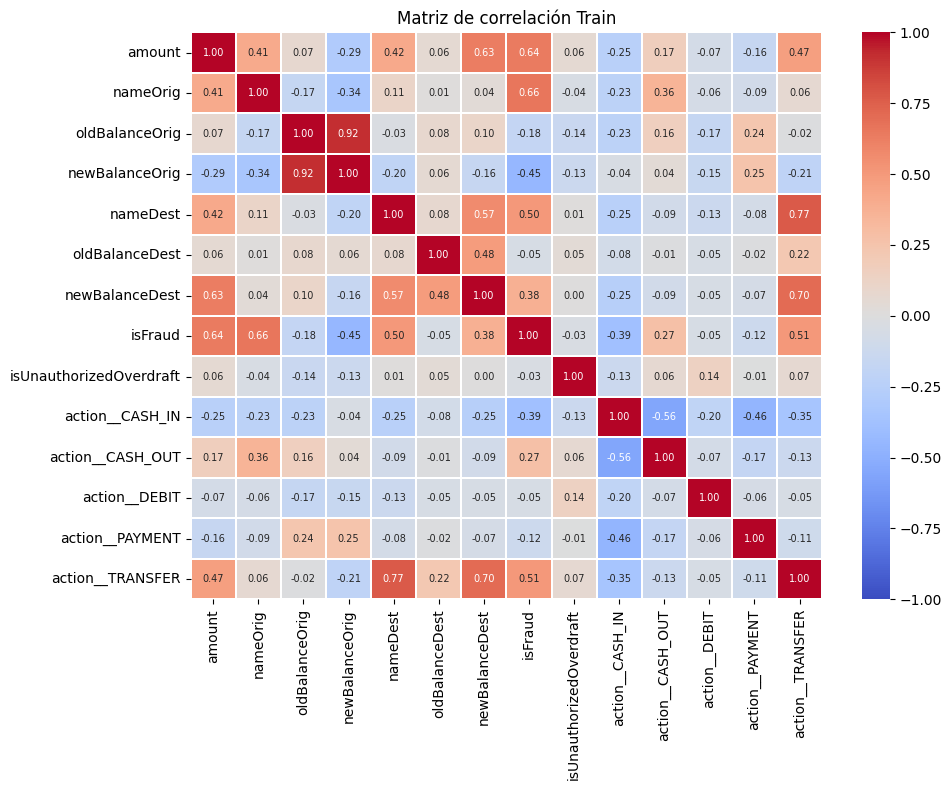

In [ ]:
#Hacer matriz de correlaci√≥n para TRAIN

numeric_df_train = df_train.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df_train.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            annot_kws={"size": 7}, fmt=".2f", linewidths=0.3)

plt.title('Matriz de correlaci√≥n Train', fontsize=12)
plt.tight_layout()
plt.show()

### Desbalance datos TRAIN


Porcentajes:
Clase 0: 90.93%
Clase 1: 9.07%


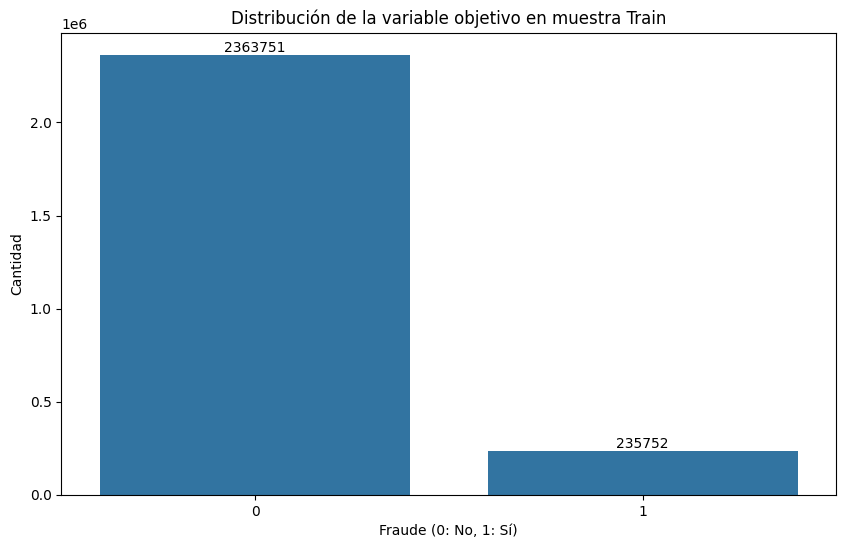

In [ ]:
#Analizar desbalance de clases

class_dist = df_train['isFraud'].value_counts(normalize=True)
print("\nPorcentajes:")
for clase, porcentaje in class_dist.items():
    print(f"Clase {clase}: {porcentaje*100:.2f}%")

# Visualizamos la distribuci√≥n con un gr√°fico de barras
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='isFraud')
plt.title('Distribuci√≥n de la variable objetivo en muestra Train')
plt.xlabel('Fraude (0: No, 1: S√≠)')
plt.ylabel('Cantidad')

# A√±adimos los valores exactos sobre cada barra
for i in plt.gca().containers[0]:
    plt.text(i.get_x() + i.get_width()/2,
            i.get_height(),
            f'{int(i.get_height())}',
            ha='center', va='bottom')

plt.show()

Como se observa en la gr√°fica, la distribucui√≥n de los datos para la variable objetivo, la cual detecta si la transacci√≥n es fraude, est√° desbalanceada un 10 a 1.

## 2.2 Limpieza datos TRAIN

Eliminar valores NA y 0 TRAIN

In [ ]:
#Eliminar valores de NA de la variable de inter√©s
df_train = df_train.dropna(subset=['isFraud'])

#Separar los datos de entrada X como variables explicativas y la variable a predecir Y en df_train
X_train,y_train = df_train.drop(['isFraud'], axis=1), df_train['isFraud']
display(X_train.head())
display(y_train.head())

#Valores nulos
X_train.isnull().sum()

amount  nameOrig  oldBalanceOrig  newBalanceOrig  nameDest  \
0    83567.84      1270            0.00        83567.84     17600   
1  1221867.91     70795      1221867.91            0.00     22281   
2   322138.17      2881      1595257.55      1917395.71     37826   
3    89476.25     21364      1018602.32      1108078.57     32142   
4    14372.57     20391       603534.13       617906.69      9164   

   oldBalanceDest  newBalanceDest  isUnauthorizedOverdraft  action__CASH_IN  \
0        34594.35        34594.35                        0                1   
1        34873.36        34873.36                        0                0   
2       121986.83       121986.83                        0                1   
3        44718.52        44718.52                        0                1   
4       108732.54       108732.54                        0                1   

   action__CASH_OUT  action__DEBIT  action__PAYMENT  action__TRANSFER  
0                 0              0                0                 0  
1                 1              0                0                 0  
2                 0              0                0                 0  
3                 0              0                0                 0  
4                 0              0                0                 0

0    0
1    1
2    0
3    0
4    0
Name: isFraud, dtype: int64

amount                     0
nameOrig                   0
oldBalanceOrig             0
newBalanceOrig             0
nameDest                   0
oldBalanceDest             0
newBalanceDest             0
isUnauthorizedOverdraft    0
action__CASH_IN            0
action__CASH_OUT           0
action__DEBIT              0
action__PAYMENT            0
action__TRANSFER           0
dtype: int64

Como se observa que las observaciones no tienen valores nulos, no es necesario reemplazar los valores

ESTANDARIZACI√ìN DE LOS DATOS TRAIN

## 2.3 An√°lisis datos TEST

### Reporte y matriz datos TEST

In [ ]:
#An√°lisis de los datos de prueba:
df_test.head()

amount  nameOrig  oldBalanceOrig  newBalanceOrig  nameDest  \
0   73800.89     15374      2534460.75      2460659.86     35922   
1  196871.36     14559      1539057.79      1735929.16     48287   
2  230141.98     22934       502864.24       733006.22     31892   
3  227774.04      8379        60025.05       287799.09       978   
4   65725.33      5391      2851847.83      2917573.16     35100   

   oldBalanceDest  newBalanceDest  isFraud  isUnauthorizedOverdraft  \
0        81483.02        81483.02        0                        0   
1        54029.17        54029.17        0                        0   
2         8058.23         8058.23        0                        0   
3        11786.02        11786.02        0                        0   
4        21051.19        21051.19        0                        0   

   action__CASH_IN  action__CASH_OUT  action__DEBIT  action__PAYMENT  \
0                0                 1              0                0   
1                1                 0              0                0   
2                1                 0              0                0   
3                1                 0              0                0   
4                1                 0              0                0   

   action__TRANSFER  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

REPORTE DATOS TEST

In [ ]:
#An√°lisis descriptivo de los datos de prueba:
from ydata_profiling import ProfileReport
reporte_test = ProfileReport(df_test, title="Profiling Report Test dataset")
reporte_test.to_file("reporte_test.html")

reporte_test

MATRIZ DE TEST

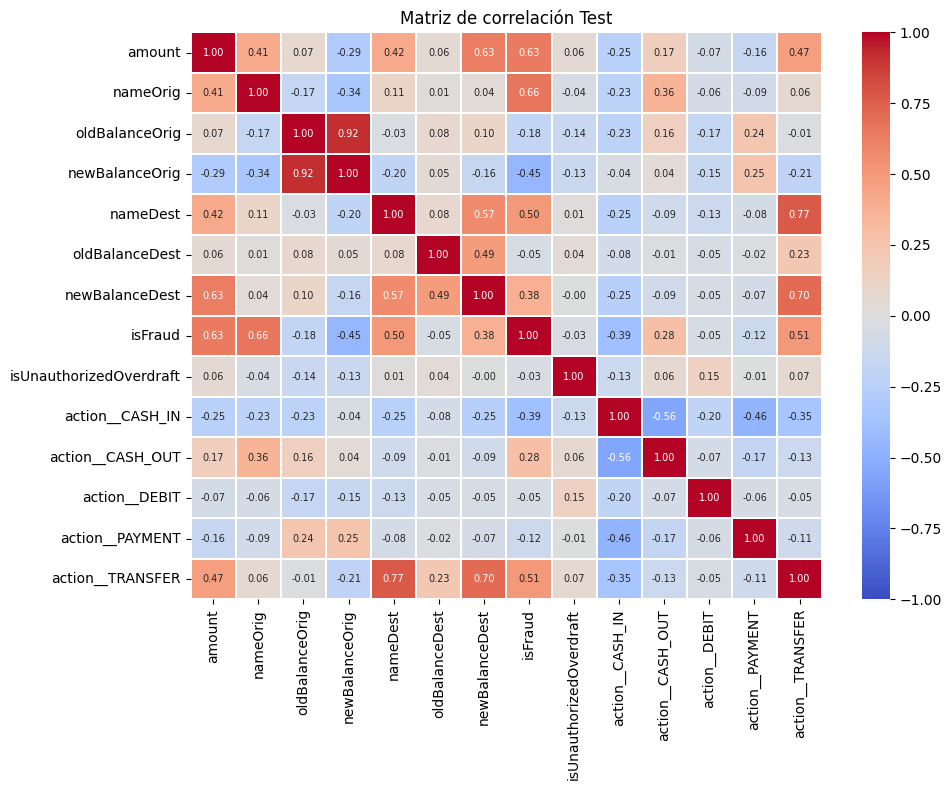

In [ ]:
#Hacer matriz de correlaci√≥n

numeric_df_test = df_test.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df_test.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            annot_kws={"size": 7}, fmt=".2f", linewidths=0.3)

plt.title('Matriz de correlaci√≥n Test', fontsize=12)
plt.tight_layout()
plt.show()

### Desbalance datos TEST


Porcentajes:
Clase 0: 90.93%
Clase 1: 9.07%


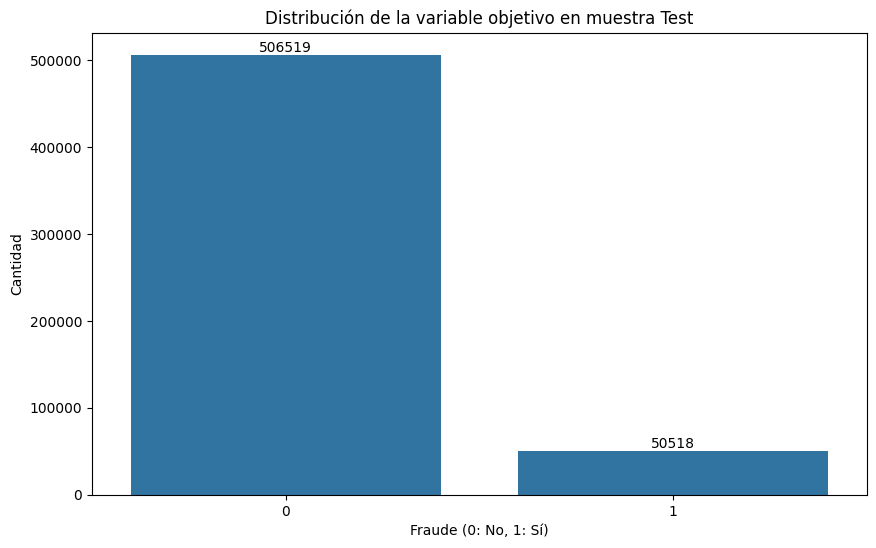

In [ ]:
#Analizar desbalance de clases

class_dist = df_test['isFraud'].value_counts(normalize=True)
print("\nPorcentajes:")
for clase, porcentaje in class_dist.items():
    print(f"Clase {clase}: {porcentaje*100:.2f}%")

# Visualizamos la distribuci√≥n con un gr√°fico de barras
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df_test, x='isFraud')
plt.title('Distribuci√≥n de la variable objetivo en muestra Test')
plt.xlabel('Fraude (0: No, 1: S√≠)')
plt.ylabel('Cantidad')

# A√±adimos los valores exactos sobre cada barra
for i in plt.gca().containers[0]:
    plt.text(i.get_x() + i.get_width()/2,
            i.get_height(),
            f'{int(i.get_height())}',
            ha='center', va='bottom')

plt.show()

Como se observa en la gr√°fica, la distribucui√≥n de los datos para la ariable objetivo, la cual detecta si la transacci√≥n es fraude, est√° desbalanceada.

## 2.4 Limpieza datos TEST

VERIFICACION DE NULOS Y DEFINIR y

In [ ]:
#Eliminar valores de NA de la variable de inter√©s
df_test = df_test.dropna(subset=['isFraud'])

#Separar los datos de entrada X como variables explicativas y la variable a predecir Y en df_test
X_test,y_test = df_test.drop(['isFraud'], axis=1), df_test['isFraud']
display(X_test.head())
display(y_test.head())
print(X_test.shape)

#valores nulos
X_test.isnull().sum()

amount  nameOrig  oldBalanceOrig  newBalanceOrig  nameDest  \
0   73800.89     15374      2534460.75      2460659.86     35922   
1  196871.36     14559      1539057.79      1735929.16     48287   
2  230141.98     22934       502864.24       733006.22     31892   
3  227774.04      8379        60025.05       287799.09       978   
4   65725.33      5391      2851847.83      2917573.16     35100   

   oldBalanceDest  newBalanceDest  isUnauthorizedOverdraft  action__CASH_IN  \
0        81483.02        81483.02                        0                0   
1        54029.17        54029.17                        0                1   
2         8058.23         8058.23                        0                1   
3        11786.02        11786.02                        0                1   
4        21051.19        21051.19                        0                1   

   action__CASH_OUT  action__DEBIT  action__PAYMENT  action__TRANSFER  
0                 1              0                0                 0  
1                 0              0                0                 0  
2                 0              0                0                 0  
3                 0              0                0                 0  
4                 0              0                0                 0

0    0
1    0
2    0
3    0
4    0
Name: isFraud, dtype: int64

(557037, 13)


amount                     0
nameOrig                   0
oldBalanceOrig             0
newBalanceOrig             0
nameDest                   0
oldBalanceDest             0
newBalanceDest             0
isUnauthorizedOverdraft    0
action__CASH_IN            0
action__CASH_OUT           0
action__DEBIT              0
action__PAYMENT            0
action__TRANSFER           0
dtype: int64

Como se observa que las observaciones no tienen valores nulos, no es necesario reemplazar los valores.

#3. Procesamiento Inicial

CREAR NUEVAS VARIABLES DERIVADAS

balance_change_Orig = oldBalanceOrig - newBalanceOrig Eliminar las variables originales: oldBalanceOrig, newBalanceOrig, newBalanceDest.

Borramos newBalanceDest porque en todas las casillas es igual a oldBalanceDest

In [ ]:
# ‚úÖ CREACI√ìN DE VARIABLES DERIVADAS Y TRANSFORMACI√ìN DE VARIABLES DE ACCI√ìN

# üìå Para TRAIN
# Crear nuevas variables derivadas
X_train['balance_change_Orig'] = X_train['oldBalanceOrig'] - X_train['newBalanceOrig']

# Eliminar columnas originales
X_train.drop(columns=['oldBalanceOrig', 'newBalanceOrig', 'newBalanceDest'], inplace=True)


# üìå Para TEST
# Crear nuevas variables derivadas
X_test['balance_change_Orig'] = X_test['oldBalanceOrig'] - X_test['newBalanceOrig']

# Eliminar columnas originales
X_test.drop(columns=['oldBalanceOrig', 'newBalanceOrig', 'newBalanceDest'], inplace=True)



# ‚úî Verificar las primeras filas
X_train.head(), X_test.head()

Estandarizaci√≥n de Test y Train por aparte

In [ ]:

# 1Ô∏è‚É£ Definir variables continuas, binarias y categ√≥ricas
variables_continuas = ['amount', 'balance_change_Orig', 'oldBalanceDest' ]
variables_binarias = ['isUnauthorizedOverdraft', 'action__CASH_IN', 'action__CASH_OUT', 'action__DEBIT', 'action__PAYMENT', 'action__TRANSFER']
variables_ids = ['nameOrig', 'nameDest']  # <-- Mantenemos estas columnas sin cambios

# 2Ô∏è‚É£ Aplicar StandardScaler SOLO a las variables continuas
X_continuas_train = X_train[variables_continuas]
X_continuas_test = X_test[variables_continuas]

scaler = StandardScaler()
X_train_scaled_cont = scaler.fit_transform(X_continuas_train)
X_test_scaled_cont = scaler.transform(X_continuas_test)

# 3Ô∏è‚É£ Reconstruir X_train_scaled y X_test_scaled manteniendo las binarias y categ√≥ricas sin cambios
X_train_scaled = pd.DataFrame(X_train_scaled_cont, columns=variables_continuas).reset_index(drop=True)
X_test_scaled = pd.DataFrame(X_test_scaled_cont, columns=variables_continuas).reset_index(drop=True)

# 4Ô∏è‚É£ Agregar variables binarias, categ√≥ricas y los IDs sin modificar
X_train_scaled[variables_binarias] = X_train[variables_binarias].reset_index(drop=True)
X_test_scaled[variables_binarias] = X_test[variables_binarias].reset_index(drop=True)


X_train_scaled[variables_ids] = X_train[variables_ids].reset_index(drop=True)
X_test_scaled[variables_ids] = X_test[variables_ids].reset_index(drop=True)

# 5Ô∏è‚É£ Verificar resultados
X_train_scaled.head(), X_test_scaled.head()


MIRAR CORRELACION DE VARIABLES CON Y

In [ ]:
#Borrar variables poco relevantes

# 1Ô∏è‚É£ Eliminar variables identificadoras y redundantes

from sklearn.preprocessing import LabelEncoder

# Codificar la variable 'action' en TRAIN y TEST
encoder = LabelEncoder()
X_train['action'] = encoder.fit_transform(X_train['action'])
X_test['action'] = encoder.transform(X_test['action'])

# 2Ô∏è‚É£ Verificar correlaciones bajas con isFraud
correlaciones = X_train.corrwith(y_train).abs().sort_values()
print("Correlaciones con isFraud:\n", correlaciones)


# 4 Primer modelo

## REGRESI√ìN RIDGE L2


üîπ Mejor modelo: LogisticRegression(C=0.001, max_iter=1000, solver='liblinear')
üîπ Mejores hiperpar√°metros: {'C': 0.001}

üîπ M√©tricas en el conjunto de prueba:
Accuracy: 0.8974
Precision: 0.9225
Recall: 0.8974
F1-Score: 0.9069


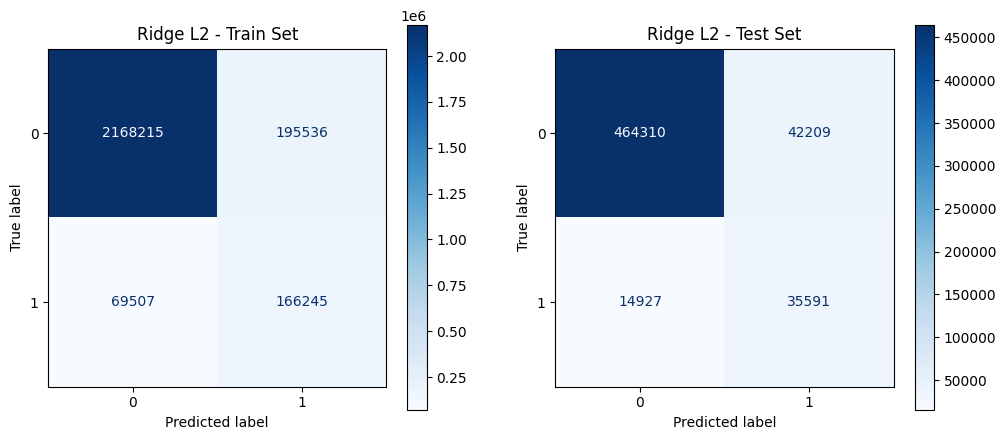

In [ ]:
# Importar librer√≠as
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1Ô∏è‚É£ Definir el modelo base con Ridge (L2)
model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)

# 2Ô∏è‚É£ Definir la grilla de hiperpar√°metros
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Inverso de la fuerza de regularizaci√≥n
}

# 3Ô∏è‚É£ Realizar b√∫squeda de hiperpar√°metros
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 4Ô∏è‚É£ Obtener el mejor modelo y sus hiperpar√°metros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"\nüîπ Mejor modelo: {best_model}")
print(f"üîπ Mejores hiperpar√°metros: {best_params}")

# 5Ô∏è‚É£ Realizar predicciones
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# 6Ô∏è‚É£ Calcular m√©tricas
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("\nüîπ M√©tricas en el conjunto de prueba:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# 7Ô∏è‚É£ Mostrar matrices de confusi√≥n
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matriz de Confusi√≥n - Train
cm_train = confusion_matrix(y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
axes[0].set_title("Ridge L2 - Train Set")
disp_train.plot(ax=axes[0], cmap='Blues', values_format='d')

# Matriz de Confusi√≥n - Test
cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
axes[1].set_title("Ridge L2 - Test Set")
disp_test.plot(ax=axes[1], cmap='Blues', values_format='d')

plt.show()


BALANCEO DE DATOS

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# 1Ô∏è‚É£ Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"\nüîπ Datos originales: {y_train.value_counts().to_dict()}")
print(f"üîπ Datos balanceados con SMOTE: {y_train_balanced.value_counts().to_dict()}")


üîπ Datos originales: {0: 2363751, 1: 235752}
üîπ Datos balanceados con SMOTE: {0: 2363751, 1: 2363751}


Ridge l2 con datos balanceados


üîπ Mejor modelo: LogisticRegression(C=0.001, max_iter=1000, solver='liblinear')
üîπ Mejores hiperpar√°metros: {'C': 0.001}

üîπ M√©tricas en el conjunto de prueba (Balanceado con SMOTE):
Accuracy: 0.7013
Precision: 0.9304
Recall: 0.7013
F1-Score: 0.7648


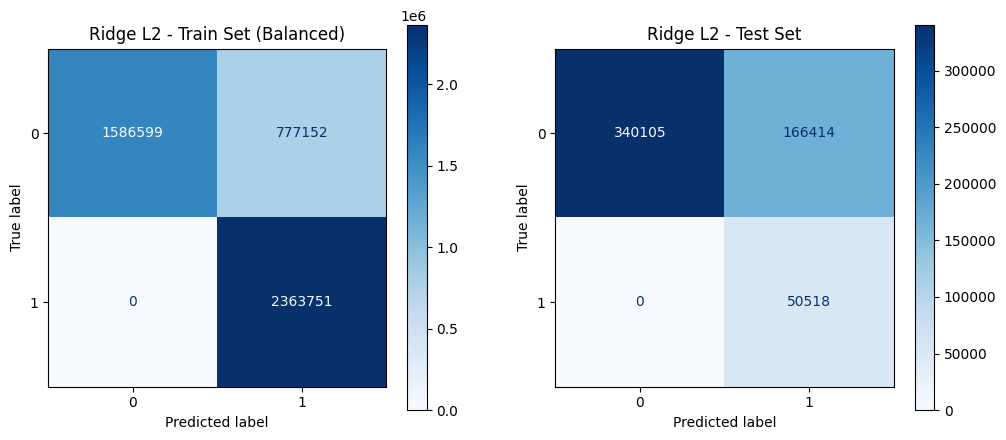

In [ ]:
# 2Ô∏è‚É£ Definir el modelo base con Ridge (L2)
model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)

# 3Ô∏è‚É£ Definir la grilla de hiperpar√°metros
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Inverso de la fuerza de regularizaci√≥n
}

# 4Ô∏è‚É£ Realizar b√∫squeda de hiperpar√°metros con los datos balanceados
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

# 5Ô∏è‚É£ Obtener el mejor modelo y sus hiperpar√°metros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"\nüîπ Mejor modelo: {best_model}")
print(f"üîπ Mejores hiperpar√°metros: {best_params}")

# 6Ô∏è‚É£ Realizar predicciones
y_train_pred_balanced = best_model.predict(X_train_balanced)
y_test_pred_balanced = best_model.predict(X_test)

# 7Ô∏è‚É£ Calcular m√©tricas
accuracy = accuracy_score(y_test, y_test_pred_balanced)
precision = precision_score(y_test, y_test_pred_balanced, average='weighted')
recall = recall_score(y_test, y_test_pred_balanced, average='weighted')
f1 = f1_score(y_test, y_test_pred_balanced, average='weighted')

print("\nüîπ M√©tricas en el conjunto de prueba (Balanceado con SMOTE):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# 8Ô∏è‚É£ Mostrar matrices de confusi√≥n
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matriz de Confusi√≥n - Train (Balanceado)
cm_train = confusion_matrix(y_train_balanced, y_train_pred_balanced)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
axes[0].set_title("Ridge L2 - Train Set (Balanced)")
disp_train.plot(ax=axes[0], cmap='Blues', values_format='d')

# Matriz de Confusi√≥n - Test
cm_test = confusion_matrix(y_test, y_test_pred_balanced)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
axes[1].set_title("Ridge L2 - Test Set")
disp_test.plot(ax=axes[1], cmap='Blues', values_format='d')

plt.show()

## REGRESION Lasso (L1)

In [ ]:
# Importar librer√≠as
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1Ô∏è‚É£ Definir el modelo base con Lasso (L1)
model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

# 2Ô∏è‚É£ Definir la grilla de hiperpar√°metros
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Inverso de la fuerza de regularizaci√≥n
}

# 3Ô∏è‚É£ Realizar b√∫squeda de hiperpar√°metros sin balancear los datos
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 4Ô∏è‚É£ Obtener el mejor modelo y sus hiperpar√°metros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"\nüîπ Mejor modelo: {best_model}")
print(f"üîπ Mejores hiperpar√°metros: {best_params}")

# 5Ô∏è‚É£ Realizar predicciones
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# 6Ô∏è‚É£ Calcular m√©tricas
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("\nüîπ M√©tricas en el conjunto de prueba:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# 7Ô∏è‚É£ Mostrar matrices de confusi√≥n
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matriz de Confusi√≥n - Train
cm_train = confusion_matrix(y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
axes[0].set_title("Lasso L1 - Train Set")
disp_train.plot(ax=axes[0], cmap='Blues', values_format='d')

# Matriz de Confusi√≥n - Test
cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
axes[1].set_title("Lasso L1 - Test Set")
disp_test.plot(ax=axes[1], cmap='Blues', values_format='d')

plt.show()


KeyboardInterrupt: 